# Credit Card Spend Prediction

<b>Business Problem:--

<b>-Company collected data from 5000 customers. The objective of this case study is to understand what's driving the total spend of credit card(Primary Card + Secondary card)

In [1]:
#Import Liabraries
import pandas as pd
import numpy as np
import statsmodels as sm
import scipy.stats as stat

<b>Load dataset

In [2]:
Bank_data= pd.read_excel('Data Set.xlsx')
Bank_data.head(5)

custid  region  townsize  gender  age  agecat birthmonth  ed  \
0  3964-QJWTRG-NPN       1       2.0       1   20       2  September  15   
1  0648-AIPJSP-UVM       5       5.0       0   22       2        May  17   
2  5195-TLUDJE-HVO       3       4.0       1   67       6       June  14   
3  4459-VLPQUH-3OL       4       3.0       0   23       2        May  16   
4  8158-SMTQFB-CNO       2       2.0       0   26       3       July  16   

   edcat  jobcat     ...       owncd  ownpda  ownpc  ownipod  owngame  ownfax  \
0      3       1     ...           0       0      0        1        1       0   
1      4       2     ...           1       1      1        1        1       1   
2      2       2     ...           1       0      0        0        0       0   
3      3       2     ...           1       0      1        1        1       0   
4      3       2     ...           1       0      1        0        1       0   

   news  response_01  response_02  response_03  
0     0            0            1            0  
1     1            0            0            0  
2     1            0            0            0  
3     1            1            0            0  
4     0            0            1            0  

[5 rows x 130 columns]

<b>Datatypes of each variable

In [3]:
Bank_data.dtypes

custid          object
region           int64
townsize       float64
gender           int64
age              int64
agecat           int64
birthmonth      object
ed               int64
edcat            int64
jobcat           int64
union            int64
employ           int64
empcat           int64
retire           int64
income           int64
lninc          float64
inccat           int64
debtinc        float64
creddebt       float64
lncreddebt     float64
othdebt        float64
lnothdebt      float64
default          int64
jobsat           int64
marital          int64
spoused          int64
spousedcat       int64
reside           int64
pets             int64
pets_cats        int64
                ...   
cardten        float64
lncardten      float64
wireless         int64
wiremon        float64
lnwiremon      float64
wireten        float64
lnwireten      float64
multline         int64
voice            int64
pager            int64
internet         int64
callid           int64
callwait   

<b>Running Pandas profiling-

In [4]:
import pandas_profiling
Bank_data_report= pandas_profiling.ProfileReport(Bank_data)
Bank_data_report

In [5]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [6]:
Bank_data.shape

(5000, 130)

<b>Creating a new variable Total_Spend and dropping cardspent+card2spent

In [7]:
Bank_data['Total Spend']= Bank_data['cardspent']+ Bank_data['card2spent']
Bank_data.drop(['cardspent','card2spent'], axis=1, inplace= True)

<b>Relation between income & Total_Spend by scatterplot

C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


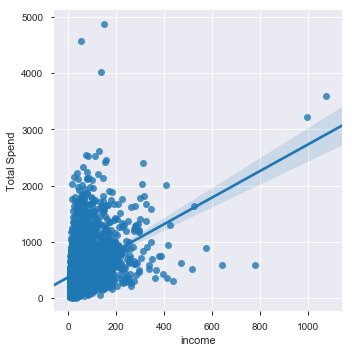

In [8]:
import seaborn as sns
import matplotlib as plt

sns.lmplot(x='income', y='Total Spend', data=Bank_data)

There is a linear relationship between both of the variables

In [9]:
#As per the Data Dictionery, Converting features into Categorical
for x in ['region','townsize', 'gender', 'agecat','birthmonth','edcat', 'jobcat', 'union', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'addresscat', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']:Bank_data[x]= Bank_data[x].astype('object')

<b>Splitting numeric and Categoical features

In [10]:
cat_var = [key for key in dict(Bank_data.dtypes) if dict(Bank_data.dtypes)[key] in ['object']]
num_var = [key for key in dict(Bank_data.dtypes) if dict(Bank_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

In [11]:
print(cat_var)

['custid', 'region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat', 'jobcat', 'union', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'addresscat', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']


In [12]:
print(num_var)

['age', 'ed', 'employ', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'address', 'cars', 'carvalue', 'commutetime', 'cardtenure', 'card2tenure', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'Total Spend']


In [13]:
num_var_data= Bank_data[num_var]
num_var_data.head(5)

age  ed  employ  income     lninc  debtinc  creddebt  lncreddebt   othdebt  \
0   20  15       0      31  3.433987     11.1  1.200909    0.183079  2.240091   
1   22  17       0      15  2.708050     18.6  1.222020    0.200505  1.567980   
2   67  14      16      35  3.555348      9.9  0.928620   -0.074056  2.536380   
3   23  16       0      20  2.995732      5.7  0.022800   -3.780995  1.117200   
4   26  16       1      23  3.135494      1.7  0.214659   -1.538705  0.176341   

   lnothdebt     ...       cardmon  lncardmon  cardten  lncardten  wiremon  \
0   0.806516     ...         14.25   2.656757     60.0   4.094345     0.00   
1   0.449788     ...         16.00   2.772589    610.0   6.413459    45.65   
2   0.930738     ...         23.00   3.135494   1410.0   7.251345     0.00   
3   0.110826     ...         21.00   3.044522    685.0   6.529419     0.00   
4  -1.735336     ...         17.25   2.847812    360.0   5.886104    19.05   

   lnwiremon  wireten  lnwireten  hourstv  Total Spend  
0        NaN     0.00        NaN       13       149.46  
1   3.821004  1683.55   7.428660       18        77.54  
2        NaN     0.00        NaN       21       359.97  
3        NaN     0.00        NaN       26       359.41  
4   2.947067   410.80   6.018106       27       507.83  

[5 rows x 49 columns]

In [14]:
cat_var_data= Bank_data[cat_var]
cat_var_data.head(5)

custid region townsize gender agecat birthmonth edcat jobcat  \
0  3964-QJWTRG-NPN      1        2      1      2  September     3      1   
1  0648-AIPJSP-UVM      5        5      0      2        May     4      2   
2  5195-TLUDJE-HVO      3        4      1      6       June     2      2   
3  4459-VLPQUH-3OL      4        3      0      2        May     3      2   
4  8158-SMTQFB-CNO      2        2      0      3       July     3      2   

  union empcat     ...     owncd ownpda ownpc ownipod owngame ownfax news  \
0     1      1     ...         0      0     0       1       1      0    0   
1     0      1     ...         1      1     1       1       1      1    1   
2     0      5     ...         1      0     0       0       0      0    1   
3     0      1     ...         1      0     1       1       1      0    1   
4     0      1     ...         1      0     1       0       1      0    0   

  response_01 response_02 response_03  
0           0           1           0  
1           0           0           0  
2           0           0           0  
3           1           0           0  
4           0           1           0  

[5 rows x 80 columns]

<b>Dropping variables

In [15]:
#Dropping variables which are not adding value to analysis :-
cat_var_data.drop(['custid','birthmonth'],axis=1, inplace=True)
#Dropping highly correlated categorical variables :-
cat_var_data.drop(['addresscat','agecat','card2tenurecat','commutecat','edcat','inccat','marital','spousedcat','equip'],axis=1,inplace= True) 

C:\Users\Aanchal\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
cat_var_data.columns

Index(['region', 'townsize', 'gender', 'jobcat', 'union', 'empcat', 'retire',
       'default', 'jobsat', 'homeown', 'hometype', 'carown', 'cartype',
       'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecar',
       'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail',
       'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor',
       'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote',
       'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenurecat', 'card2',
       'card2type', 'card2benefit', 'card2fee', 'active', 'bfast', 'churn',
       'tollfree', 'callcard', 'wireless', 'multline', 'voice', 'pager',
       'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv',
       'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame',
       'ownfax', 'news', 'response_01', 'response_02', 'response_03'],
      dtype='object')

<b>Data Audit Report

In [17]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [18]:
num_var_data.apply(var_summary).T

N   NMISS           SUM        MEAN      MEDIAN  \
age             5000.0     0.0  2.351280e+05   47.025600   47.000000   
ed              5000.0     0.0  7.271500e+04   14.543000   14.000000   
employ          5000.0     0.0  4.865200e+04    9.730400    7.000000   
income          5000.0     0.0  2.737980e+05   54.759600   38.000000   
lninc           5000.0     0.0  1.849955e+04    3.699909    3.637586   
debtinc         5000.0     0.0  4.977080e+04    9.954160    8.800000   
creddebt        5000.0     0.0  9.286628e+03    1.857326    0.926437   
lncreddebt      4999.0     1.0 -6.521372e+02   -0.130454   -0.076106   
othdebt         5000.0     0.0  1.827230e+04    3.654460    2.098540   
lnothdebt       4999.0     1.0  3.483879e+03    0.696915    0.741537   
spoused         5000.0     0.0  3.056400e+04    6.112800   -1.000000   
reside          5000.0     0.0  1.102000e+04    2.204000    2.000000   
pets            5000.0     0.0  1.533700e+04    3.067400    2.000000   
pets_cats       5000.0     0.0  2.502000e+03    0.500400    0.000000   
pets_dogs       5000.0     0.0  1.962000e+03    0.392400    0.000000   
pets_birds      5000.0     0.0  5.520000e+02    0.110400    0.000000   
pets_reptiles   5000.0     0.0  2.780000e+02    0.055600    0.000000   
pets_small      5000.0     0.0  5.730000e+02    0.114600    0.000000   
pets_saltfish   5000.0     0.0  2.330000e+02    0.046600    0.000000   
pets_freshfish  5000.0     0.0  9.237000e+03    1.847400    0.000000   
address         5000.0     0.0  8.201200e+04   16.402400   14.000000   
cars            5000.0     0.0  1.065300e+04    2.130600    2.000000   
carvalue        5000.0     0.0  1.161629e+05   23.232580   17.000000   
commutetime     4998.0     2.0  1.266770e+05   25.345538   25.000000   
cardtenure      5000.0     0.0  8.327900e+04   16.655800   14.000000   
card2tenure     5000.0     0.0  6.542200e+04   13.084400   12.000000   
tenure          5000.0     0.0  1.910240e+05   38.204800   38.000000   
longmon         5000.0     0.0  6.735725e+04   13.471450    9.550000   
lnlongmon       5000.0     0.0  1.144390e+04    2.288779    2.256541   
longten         4997.0     3.0  3.542232e+06  708.871753  350.000000   
lnlongten       4997.0     3.0  2.803966e+04    5.611298    5.857933   
tollmon         5000.0     0.0  6.632225e+04   13.264450    0.000000   
lntollmon       2378.0  2622.0  7.712400e+03    3.243230    3.228826   
tollten         5000.0     0.0  2.889163e+06  577.832510    0.000000   
lntollten       2378.0  2622.0  1.565861e+04    6.584783    6.858013   
equipmon        5000.0     0.0  6.495655e+04   12.991310    0.000000   
lnequipmon      1704.0  3296.0  6.134805e+03    3.600238    3.598681   
equipten        5000.0     0.0  2.350882e+06  470.176400    0.000000   
lnequipten      1704.0  3296.0  1.149739e+04    6.747296    7.050556   
cardmon         5000.0     0.0  7.721925e+04   15.443850   13.750000   
lncardmon       3581.0  1419.0  1.041975e+04    2.909733    2.904165   
cardten         4998.0     2.0  3.600951e+06  720.478391  425.000000   
lncardten       3578.0  1422.0  2.299333e+04    6.426309    6.639876   
wiremon         5000.0     0.0  5.350595e+04   10.701190    0.000000   
lnwiremon       1344.0  3656.0  4.845121e+03    3.605001    3.597997   
wireten         5000.0     0.0  2.109923e+06  421.984610    0.000000   
lnwireten       1344.0  3656.0  9.150129e+03    6.808132    7.147185   
hourstv         5000.0     0.0  9.822500e+04   19.645000   20.000000   
Total Spend     5000.0     0.0  2.490393e+06  498.078630  414.250000   

                        STD           VAR         CV        MIN         P1  \
age               17.770338  3.157849e+02   0.377886  18.000000  18.000000   
ed                 3.281083  1.076550e+01   0.225613   6.000000   8.000000   
employ             9.690929  9.391410e+01   0.995944   0.000000   0.000000   
income            55.377511  3.066669e+03   1.011284   9.000000   9.000000   
lninc              0.747072  5

In [19]:
num_var_data.to_csv('Numerical_Var_Summary.csv')

<b>Outliers Capping

In [20]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

num_var_data=num_var_data.apply(lambda x:outlier_capping(x))
Out_cap=num_var_data.apply(lambda x:var_summary(x)).T
Out_cap

N   NMISS           SUM        MEAN      MEDIAN  \
age             5000.0     0.0  2.351280e+05   47.025600   47.000000   
ed              5000.0     0.0  7.272100e+04   14.544200   14.000000   
employ          5000.0     0.0  4.849000e+04    9.698000    7.000000   
income          5000.0     0.0  2.681495e+05   53.629900   38.000000   
lninc           5000.0     0.0  1.848525e+04    3.697049    3.637586   
debtinc         5000.0     0.0  4.957060e+04    9.914120    8.800000   
creddebt        5000.0     0.0  8.791845e+03    1.758369    0.926437   
lncreddebt      4999.0     1.0 -6.387705e+02   -0.127780   -0.076106   
othdebt         5000.0     0.0  1.761253e+04    3.522506    2.098540   
lnothdebt       4999.0     1.0  3.491233e+03    0.698386    0.741537   
spoused         5000.0     0.0  3.047700e+04    6.095400   -1.000000   
reside          5000.0     0.0  1.097100e+04    2.194200    2.000000   
pets            5000.0     0.0  1.524600e+04    3.049200    2.000000   
pets_cats       5000.0     0.0  2.452000e+03    0.490400    0.000000   
pets_dogs       5000.0     0.0  1.914000e+03    0.382800    0.000000   
pets_birds      5000.0     0.0  5.300000e+02    0.106000    0.000000   
pets_reptiles   5000.0     0.0  2.500000e+02    0.050000    0.000000   
pets_small      5000.0     0.0  5.140000e+02    0.102800    0.000000   
pets_saltfish   5000.0     0.0  1.130000e+02    0.022600    0.000000   
pets_freshfish  5000.0     0.0  9.174000e+03    1.834800    0.000000   
address         5000.0     0.0  8.183200e+04   16.366400   14.000000   
cars            5000.0     0.0  1.063800e+04    2.127600    2.000000   
carvalue        5000.0     0.0  1.160112e+05   23.202230   17.000000   
commutetime     4998.0     2.0  1.266105e+05   25.332233   25.000000   
cardtenure      5000.0     0.0  8.327900e+04   16.655800   14.000000   
card2tenure     5000.0     0.0  6.542200e+04   13.084400   12.000000   
tenure          5000.0     0.0  1.910270e+05   38.205400   38.000000   
longmon         5000.0     0.0  6.636320e+04   13.272640    9.550000   
lnlongmon       5000.0     0.0  1.144306e+04    2.288612    2.256541   
longten         4997.0     3.0  3.469529e+06  694.322373  350.000000   
lnlongten       4997.0     3.0  2.804452e+04    5.612272    5.857933   
tollmon         5000.0     0.0  6.570038e+04   13.140075    0.000000   
lntollmon       2378.0  2622.0  7.711204e+03    3.242727    3.228826   
tollten         5000.0     0.0  2.850651e+06  570.130195    0.000000   
lntollten       2378.0  2622.0  1.566136e+04    6.585937    6.858013   
equipmon        5000.0     0.0  6.454358e+04   12.908715    0.000000   
lnequipmon      1704.0  3296.0  6.133932e+03    3.599725    3.598681   
equipten        5000.0     0.0  2.316992e+06  463.398395    0.000000   
lnequipten      1704.0  3296.0  1.149833e+04    6.747846    7.050556   
cardmon         5000.0     0.0  7.633475e+04   15.266950   13.750000   
lncardmon       3581.0  1419.0  1.041742e+04    2.909082    2.904165   
cardten         4998.0     2.0  3.534781e+06  707.239096  425.000000   
lncardten       3578.0  1422.0  2.300496e+04    6.429558    6.639876   
wiremon         5000.0     0.0  5.265135e+04   10.530270    0.000000   
lnwiremon       1344.0  3656.0  4.844080e+03    3.604226    3.597997   
wireten         5000.0     0.0  2.049800e+06  409.960020    0.000000   
lnwireten       1344.0  3656.0  9.150155e+03    6.808151    7.147185   
hourstv         5000.0     0.0  9.813300e+04   19.626600   20.000000   
Total Spend     5000.0     0.0  2.467176e+06  493.435286  414.250000   

                       STD            VAR        CV        MIN         P1  \
age              17.770338     315.784902  0.377886  18.000000  18.000000   
ed                3.242553      10.514149  0.222945   8.000000   8.000000   
employ            9.581689      91.808758  0.988007   0.000000   0.000000   
income           46.567698    2168.550537  0.868316   9.000000   9.000000   
lninc             0.738495       0.

In [21]:
Out_cap.to_csv('Outlier_Treatment.csv')

<b>Checking Misssing values

In [22]:
Miss_data= num_var_data.isna().sum()
Miss_data[Miss_data>0]

lncreddebt        1
lnothdebt         1
commutetime       2
longten           3
lnlongten         3
lntollmon      2622
lntollten      2622
lnequipmon     3296
lnequipten     3296
lncardmon      1419
cardten           2
lncardten      1422
lnwiremon      3656
lnwireten      3656
dtype: int64

<b>Dropping Variables with high missing values:-

In [23]:
num_var_data.drop(['lntollmon','lntollten','lnequipmon','lnequipten','lncardmon','lncardten','lnwiremon','lnwireten'],axis=1,inplace=True)

<b>Missing Value Treatment

In [24]:
num_var_data['lncreddebt']=num_var_data['lncreddebt'].fillna(num_var_data['lncreddebt'].median())
num_var_data['lnothdebt']=num_var_data['lnothdebt'].fillna(num_var_data['lnothdebt'].median())
num_var_data['commutetime']=num_var_data['commutetime'].fillna(num_var_data['commutetime'].median())
num_var_data['longten']=num_var_data['longten'].fillna(num_var_data['longten'].median())
num_var_data['lnlongten']=num_var_data['lnlongten'].fillna(num_var_data['lnlongten'].median())
num_var_data['cardten']=num_var_data['cardten'].fillna(num_var_data['cardten'].median())

In [25]:
num_var_data.to_csv('Missing_Value_Treatment.csv')

In [26]:
num_var_data.columns

Index(['age', 'ed', 'employ', 'income', 'lninc', 'debtinc', 'creddebt',
       'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets',
       'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'address', 'cars', 'carvalue',
       'commutetime', 'cardtenure', 'card2tenure', 'tenure', 'longmon',
       'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'tollten', 'equipmon',
       'equipten', 'cardmon', 'cardten', 'wiremon', 'wireten', 'hourstv',
       'Total Spend'],
      dtype='object')

In [27]:
cat_var_data.columns

Index(['region', 'townsize', 'gender', 'jobcat', 'union', 'empcat', 'retire',
       'default', 'jobsat', 'homeown', 'hometype', 'carown', 'cartype',
       'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecar',
       'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail',
       'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor',
       'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote',
       'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenurecat', 'card2',
       'card2type', 'card2benefit', 'card2fee', 'active', 'bfast', 'churn',
       'tollfree', 'callcard', 'wireless', 'multline', 'voice', 'pager',
       'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv',
       'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame',
       'ownfax', 'news', 'response_01', 'response_02', 'response_03'],
      dtype='object')

<b>Creating dummies of Categorical variables

In [28]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [29]:
for c_feature in cat_var_data:
    cat_var_data[c_feature] = cat_var_data[c_feature].astype('category')
    cat_var_data=create_dummies(cat_var_data , c_feature)
cat_var_data

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


region_2  region_3  region_4  region_5  townsize_2.0  townsize_3.0  \
0            0         0         0         0             1             0   
1            0         0         0         1             0             0   
2            0         1         0         0             0             0   
3            0         0         1         0             0             1   
4            1         0         0         0             1             0   
5            0         0         1         0             0             0   
6            1         0         0         0             0             0   
7            0         1         0         0             0             0   
8            1         0         0         0             0             1   
9            1         0         0         0             1             0   
10           0         0         1         0             0             0   
11           1         0         0         0             0             0   
12           0         0         0         1             1             0   
13           0         1         0         0             1             0   
14           1         0         0         0             0             0   
15           0         1         0         0             0             0   
16           0         0         0         0             0             0   
17           0         0         0         1             1             0   
18           0         0         0         1             0             0   
19           0         0         0         0             0             0   
20           0         1         0         0             0             1   
21           1         0         0         0             0             0   
22           0         0         1         0             0             0   
23           0         1         0         0             0             0   
24           0         0         0         0             0             1   
25           0         0         1         0             0             1   
26           0         0         0         1             0             0   
27           1         0         0         0             0             0   
28           0         1         0         0             0             0   
29           0         0         0         1             0             1   
...        ...       ...       ...       ...           ...           ...   
4970         0         0         0         0             1             0   
4971         0         0         1         0             0             0   
4972         0         0         0         0             0             0   
4973         0         0         0         1             0             0   
4974         0         0         0         1             0             1   
4975         0         0         0         1             0             0   
4976         1         0         0         0             0             0   
4977         0         0         0         1             0             0   
4978         0         0         1         0             0             0   
4979         1         0         0         0             0             0   
4980         0         0         0         1             0             0   
4981         0         0         0         0             0             0   
4982         0         1         0         0             0             1   
4983         1         0         0         0             1             0   
4984         0         0         0         0             0             1   
4985         0         0         1         0             1             0   
4986         0         0         0         0             0             0   
4987         0         0         0         1             0             0   
4988         1         0         0         0             1             0   
4989         0         0         1         0             1             0   
4990         0         1         0         0          

<b>Concatinating numerical & categorical dataframes

In [30]:
credit_data= pd.concat([num_var_data,cat_var_data], axis=1)
credit_data

age    ed  employ  income     lninc  debtinc   creddebt  lncreddebt  \
0     20.0  15.0     0.0   31.00  3.433987     11.1   1.200909    0.183079   
1     22.0  17.0     0.0   15.00  2.708050     18.6   1.222020    0.200505   
2     67.0  14.0    16.0   35.00  3.555348      9.9   0.928620   -0.074056   
3     23.0  16.0     0.0   20.00  2.995732      5.7   0.033160   -3.401690   
4     26.0  16.0     1.0   23.00  3.135494      1.7   0.214659   -1.538705   
5     64.0  17.0    22.0  107.00  4.672829      5.6   1.060584    0.058820   
6     52.0  14.0    10.0   77.00  4.343805      1.9   0.501809   -0.689536   
7     44.0  16.0    11.0   97.00  4.574711     14.4   5.950368    1.783453   
8     66.0  12.0    15.0   16.00  2.772589      2.6   0.102336   -2.279494   
9     47.0  11.0    19.0   84.00  4.430817      4.1   1.770216    0.571102   
10    59.0  19.0     8.0   47.00  3.850148      8.6   1.358112    0.306095   
11    33.0   8.0     4.0   19.00  2.944439      0.9   0.130131   -2.039214   
12    44.0  10.0    12.0   73.00  4.290459      2.8   1.250928    0.223886   
13    58.0  18.0     3.0   63.00  4.143135     10.5   1.924965    0.654908   
14    72.0  20.0    27.0   17.00  2.833213      9.8   1.276156    0.243852   
15    66.0  13.0    31.0   23.00  3.135494      9.3   0.934743   -0.067484   
16    57.0  17.0    24.0  171.00  5.141664      9.5   1.803195    0.589560   
17    63.0  14.0    29.0  272.01  5.605839     10.7  13.111352    2.573478   
18    28.0  11.0     4.0   23.00  3.135494      4.8   0.190992   -1.655524   
19    78.0  16.0    10.0   22.00  3.091042     15.2   0.692208   -0.367869   
20    61.0  16.0     4.0   35.00  3.555348     10.1   1.233715    0.210030   
21    70.0  17.0     2.0   28.00  3.332205      9.3   1.195236    0.178344   
22    61.0  14.0    18.0   12.00  2.484907     21.5   0.565020   -0.570894   
23    37.0  11.0     2.0   29.00  3.367296     15.7   3.319137    1.199705   
24    39.0  12.0     5.0  130.00  4.867534     11.3   4.686110    1.544603   
25    73.0  14.0    28.0   69.00  4.234107     14.8   1.164168    0.152007   
26    26.0  16.0     0.0   24.00  3.178054     11.7   1.297296    0.260282   
27    24.0  17.0     1.0   29.00  3.367296     14.0   1.392580    0.331158   
28    77.0  15.0    26.0   11.00  2.397895     10.2   0.255816   -1.363297   
29    36.0  19.0     3.0   30.00  3.401197     15.5   0.413850   -0.882252   
...    ...   ...     ...     ...       ...      ...        ...         ...   
4970  79.0  17.0     7.0    9.00  2.197225     11.2   0.332640   -1.100694   
4971  71.0  12.0    12.0   25.00  3.218876      0.7   0.045300   -3.094448   
4972  47.0  12.0     9.0   45.00  3.806662     19.7   4.210875    1.437670   
4973  30.0  21.0     0.0   25.00  3.218876     15.8   0.355500   -1.034230   
4974  37.0  14.0    12.0   30.00  3.401197     10.9   0.958110   -0.042793   
4975  28.0  15.0     3.0   18.00  2.890372     11.6   0.787176   -0.239303   
4976  53.0  12.0    16.0   73.00  4.290459     11.7   4.586517    1.523121   
4977  41.0  10.0     1.0   18.00  2.890372      6.9   0.093150   -2.373544   
4978  22.0  11.0     3.0   17.00  2.833213      6.4   0.283968   -1.258894   
4979  71.0  10.0    11.0   34.00  3.526361     11.1   0.720834   -0.327346   
4980  33.0  15.0     0.0   30.00  3.401197     15.4   1.441440    0.365643   
4981  59.0   9.0    12.0   45.00  3.806662     13.0   1.392300    0.330957   
4982  61.0  17.0    15.0   55.00  4.007333      7.1   0.527175   -0.640223   
4983  58.0  15.0     4.0   42.00  3.737670      4.7   1.200192    0.182482   
4984  30.0  17.0     2.0   30.00  3.401197      7.6   0.326040   -1.120735   
4985  30.0  20.0     1.0   71.00  4.262680      1.6   0.572544   -0.557666   
4986  22.0  12.0     0.0   16.00  2.772589     11.7   0.604656   -0.503096   
4987  49.0  15.0     5.0   25.00  3.218876     13.8   1.031550    0.031063   
4988  61.0  15.0     2.0   17.00  2.833213     18.5   0.452880   -0.792128   
4989  79.0  17.0     3.0   15

<b>Linear Regression Assumptions Checking

C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


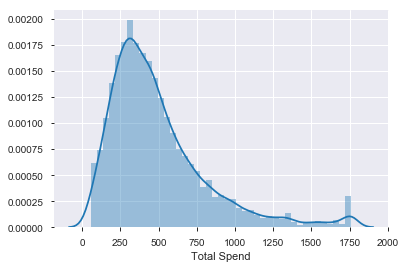

In [31]:
#Normality
#credit_data.Total Spend.hist()

# Distribution of variables
import seaborn as sns
sns.distplot(credit_data['Total Spend'])

C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


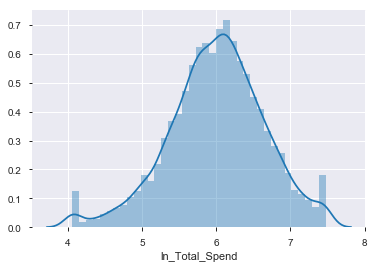

In [32]:
#Need to do log transformation as Target variable is not normally distributed
credit_data["ln_Total_Spend"]= np.log(credit_data["Total Spend"])

# Distribution of variables
import seaborn as sns
sns.distplot(credit_data["ln_Total_Spend"])

<b>Correlations:

In [33]:
#Linearity
# correlation matrix (ranges from 1 to -1)
corre=credit_data.corr()
corre

age        ed    employ    income     lninc   debtinc  \
age             1.000000 -0.093966  0.705515  0.208286  0.142984  0.039031   
ed             -0.093966  1.000000 -0.214669  0.186802  0.206332  0.013871   
employ          0.705515 -0.214669  1.000000  0.350449  0.267303  0.031801   
income          0.208286  0.186802  0.350449  1.000000  0.898172  0.011586   
lninc           0.142984  0.206332  0.267303  0.898172  1.000000  0.013177   
debtinc         0.039031  0.013871  0.031801  0.011586  0.013177  1.000000   
creddebt        0.142401  0.122362  0.225514  0.627578  0.566972  0.462598   
lncreddebt      0.108047  0.129911  0.172645  0.531268  0.583823  0.552929   
othdebt         0.154514  0.135869  0.249165  0.696227  0.636798  0.526964   
lnothdebt       0.127006  0.154450  0.195597  0.597859  0.666076  0.627995   
spoused        -0.002796  0.113928 -0.029652  0.035491  0.045417 -0.040150   
reside         -0.338338  0.022048 -0.245573 -0.073381 -0.057788 -0.026233   
pets            0.026334  0.031113  0.024996  0.008424  0.005846 -0.002531   
pets_cats       0.015743  0.008898  0.007171  0.000656  0.002866  0.001028   
pets_dogs       0.013091  0.026018  0.003706  0.022831  0.014187 -0.003278   
pets_birds     -0.013373  0.009812 -0.009249  0.001840  0.010130 -0.011250   
pets_reptiles   0.009332 -0.002268 -0.002253 -0.001956  0.003615  0.016423   
pets_small      0.002326  0.012165  0.009213 -0.008239  0.010353  0.009945   
pets_saltfish  -0.003264 -0.005433 -0.006251 -0.011377 -0.011349  0.017582   
pets_freshfish  0.023500  0.020688  0.028056  0.005421 -0.000392 -0.005829   
address         0.824189 -0.055954  0.609403  0.260612  0.210949  0.028867   
cars           -0.008368  0.002939 -0.000166  0.044807  0.051881  0.020154   
carvalue        0.175760  0.157664  0.291674  0.836840  0.801938  0.014134   
commutetime    -0.056313 -0.008465 -0.030913 -0.022761 -0.025591  0.000722   
cardtenure      0.734838 -0.094098  0.679757  0.275163  0.223678  0.020268   
card2tenure     0.691549 -0.097014  0.657052  0.268775  0.225532  0.023250   
tenure          0.612014 -0.095077  0.587677  0.237003  0.193285  0.018607   
longmon         0.468660 -0.097377  0.520906  0.193649  0.131747  0.012266   
lnlongmon       0.522203 -0.092285  0.534209  0.215801  0.164161  0.011736   
longten         0.499633 -0.103842  0.553485  0.199178  0.135259  0.014390   
...                  ...       ...       ...       ...       ...       ...   
churn_1        -0.265976  0.239036 -0.255329 -0.046093 -0.022756 -0.007721   
tollfree_1     -0.002612  0.028520  0.023498  0.159299  0.166019 -0.021065   
callcard_1      0.286721 -0.048543  0.291868  0.156149  0.134750  0.012769   
wireless_1     -0.080747  0.329985 -0.080288  0.164856  0.174722 -0.002080   
multline_1      0.238136  0.261503  0.222568  0.163377  0.140461  0.036088   
voice_1        -0.077833  0.333901 -0.080196  0.131730  0.145844 -0.000223   
pager_1        -0.074501  0.315456 -0.086572  0.151926  0.159322 -0.006286   
internet_1     -0.019941  0.066815 -0.025177  0.026915  0.027652  0.013924   
internet_2     -0.048072  0.153683 -0.060917 -0.012050 -0.003360 -0.017080   
internet_3     -0.049059  0.185075 -0.063521  0.029947  0.028140 -0.004883   
internet_4     -0.076481  0.288958 -0.090103  0.056976  0.057465  0.002058   
callid_1       -0.018343  0.043478  0.013483  0.148117  0.152553 -0.003924   
callwait_1      0.001570  0.045767  0.038749  0.173147  0.172044 -0.011490   
forward_1      -0.002783  0.038063  0.030656  0.145123  0.152949  0.007592   
confer_1        0.002204  0.043884  0.029286  0.163309  0.170901 -0.005745   
ebill_1        -0.120078  0.427759 -0.152563  0.056131  0.062816 -0.009066   
owntv_1        -0.075824  0.028754  0.015879  0.114949  0.223756 -0.002553   
ownvcr_1        0.099194  0.064940  0.127702  0.226606  0.362923  0.006001   
owndvd_1        0.093029  0.062595  0.125163  0.229476  0.367414  0.020485   
owncd_1         0.055100  0.053674  0.10743

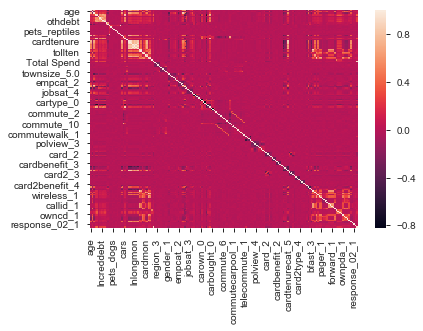

In [34]:
corre.to_csv('corre.csv')

# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(credit_data.corr())

<b>Splitting data into train and test

In [35]:
#Splitting the data
feature_columns = credit_data.columns.difference( ['ln_Total_Spend','Total Spend'] )
feature_columns

Index(['active_1', 'address', 'age', 'bfast_2', 'bfast_3', 'callcard_1',
       'callid_1', 'callwait_1', 'carbought_0', 'carbought_1',
       ...
       'townsize_2.0', 'townsize_3.0', 'townsize_4.0', 'townsize_5.0',
       'union_1', 'voice_1', 'vote_1', 'wireless_1', 'wiremon', 'wireten'],
      dtype='object', length=169)

In [36]:
#This will be used in sklearn related functions
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_data[feature_columns],
                                                  credit_data['ln_Total_Spend'],
                                                  test_size = 0.3,                                                 
                                                  random_state = 1234)

In [37]:
#from sklearn.cross_validation import train_test_split

train, test = train_test_split( credit_data,test_size = 0.3,random_state = 1234 )

In [38]:
print(len( train_X ))
print(len( test_X))

3500
1500


<b>Feature Selection by VIF,F-Regression & RFE

<b>Feature selection by VIF

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

a, b = dmatrices("ln_Total_Spend~age+ed+employ+income+lninc+debtinc+creddebt+lncreddebt+othdebt+lnothdebt+spoused+reside+pets+pets_cats+pets_dogs+pets_birds+pets_reptiles+pets_small+pets_saltfish+pets_freshfish+address+cars+carvalue+commutetime+cardtenure+card2tenure+tenure+longmon+lnlongmon+longten+lnlongten+tollmon+tollten+equipmon+equipten+cardmon+cardten+wiremon+wireten+hourstv+region_2+region_3+region_4+region_5+gender_1+jobcat_2+jobcat_3+jobcat_4+jobcat_5+jobcat_6+union_1+empcat_2+empcat_3+empcat_4+empcat_5+retire_1+default_1+jobsat_2+jobsat_3+jobsat_4+jobsat_5+homeown_1+hometype_2+hometype_3+hometype_4+carown_0+carown_1+cartype_0+cartype_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+carbought_0+carbought_1+carbuy_1+commute_2+commute_3+commute_4+commute_5+commute_6+commute_7+commute_8+commute_9+commute_10+commutecar_1+commutemotorcycle_1+commutecarpool_1+commutebus_1+commuterail_1+commutepublic_1+commutebike_1+commutewalk_1+commutenonmotor_1+telecommute_1+reason_2+reason_3+reason_4+reason_9+polview_2+polview_3+polview_4+polview_5+polview_6+polview_7+polparty_1+polcontrib_1+vote_1+card_2+card_3+card_4+card_5+cardtype_2+cardtype_3+cardtype_4+cardbenefit_2+cardbenefit_3+cardbenefit_4+cardfee_1+cardtenurecat_2+cardtenurecat_3+cardtenurecat_4+cardtenurecat_5+card2_2+card2_3+card2_4+card2_5+card2type_2+card2type_3+card2type_4+card2benefit_2+card2benefit_3+card2benefit_4+card2fee_1+active_1+bfast_2+bfast_3+churn_1+tollfree_1+callcard_1+wireless_1+multline_1+voice_1+pager_1+internet_1+internet_2+internet_3+internet_4+callid_1+callwait_1+forward_1+confer_1+ebill_1+owntv_1+ownvcr_1+owndvd_1+owncd_1+ownpda_1+ownpc_1+ownipod_1+owngame_1+ownfax_1+news_1+response_01_1+response_02_1+response_03_1", data=train, return_type='dataframe')
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns
vif.round(1)

C:\Users\Aanchal\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor        features
0         649.1       Intercept
1           8.8             age
2           2.1              ed
3          11.6          employ
4          14.7          income
5          19.8           lninc
6           6.7         debtinc
7           4.2        creddebt
8           4.5      lncreddebt
9           5.4         othdebt
10          8.0       lnothdebt
11          1.9         spoused
12          2.1          reside
13        117.6            pets
14          8.1       pets_cats
15          7.4       pets_dogs
16          3.5      pets_birds
17          2.0   pets_reptiles
18          4.0      pets_small
19          2.6   pets_saltfish
20         97.6  pets_freshfish
21          4.1         address
22          2.5            cars
23         13.8        carvalue
24          1.1     commutetime
25         23.1      cardtenure
26         19.5     card2tenure
27         34.4          tenure
28        176.8         longmon
29         36.5       lnlongmon
..          ...             ...
136         1.6         bfast_3
137         1.4         churn_1
138         6.6      tollfree_1
139         2.9      callcard_1
140         8.0      wireless_1
141         1.7      multline_1
142         2.2         voice_1
143         2.3         pager_1
144         2.0      internet_1
145         1.9      internet_2
146         2.1      internet_3
147         2.4      internet_4
148         2.4        callid_1
149         2.3      callwait_1
150         2.3       forward_1
151         2.4        confer_1
152         1.9         ebill_1
153         1.8         owntv_1
154         1.8        ownvcr_1
155         1.8        owndvd_1
156         1.7         owncd_1
157         1.8        ownpda_1
158         2.6         ownpc_1
159         1.5       ownipod_1
160         1.6       owngame_1
161         1.8        ownfax_1
162         1.6          news_1
163         1.1   response_01_1
164         1.1   response_02_1
165         1.1   response_03_1

[166 rows x 2 columns]

In [40]:
#Dropping variables with VIF>10
vif1=vif[vif['VIF Factor']>10].reset_index().loc[:,['features']]
vif1

features
0         Intercept
1            employ
2            income
3             lninc
4              pets
5    pets_freshfish
6          carvalue
7        cardtenure
8       card2tenure
9            tenure
10          longmon
11        lnlongmon
12          longten
13        lnlongten
14          tollmon
15          tollten
16          cardmon
17          cardten
18          wiremon
19          wireten
20         empcat_5
21         carown_0
22         carown_1
23        cartype_0
24        cartype_1
25    carcatvalue_1
26    carcatvalue_2
27    carcatvalue_3
28      carbought_0
29      carbought_1
30  cardtenurecat_5

<b>Feature Selection based on importance using F-Regression

In [41]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
features = train_X
target = train_y
F_values, p_values  = f_regression(features, target )

In [42]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results

Variable     F_Value P_Value
0          active_1    0.006501   0.936
1           address   12.710449   0.000
2               age    0.463887   0.496
3           bfast_2    5.369828   0.021
4           bfast_3    7.128339   0.008
5        callcard_1    2.009703   0.156
6          callid_1   11.164534   0.001
7        callwait_1   11.459207   0.001
8       carbought_0    0.165614   0.684
9       carbought_1    0.019456   0.889
10         carbuy_1    1.011083   0.315
11    carcatvalue_1  326.974816   0.000
12    carcatvalue_2   25.291145   0.000
13    carcatvalue_3  294.660400   0.000
14          card2_2   22.715253   0.000
15          card2_3   20.222926   0.000
16          card2_4   12.649486   0.000
17          card2_5   13.059277   0.000
18   card2benefit_2    2.878644   0.090
19   card2benefit_3   10.669971   0.001
20   card2benefit_4    0.498450   0.480
21       card2fee_1    1.986790   0.159
22      card2tenure   20.080039   0.000
23      card2type_2    0.553495   0.457
24      card2type_3    0.004289   0.948
25      card2type_4    0.026916   0.870
26           card_2   42.085511   0.000
27           card_3   52.476233   0.000
28           card_4   18.237740   0.000
29           card_5   10.240882   0.001
..              ...         ...     ...
139       polview_7    0.006210   0.937
140        reason_2   70.955324   0.000
141        reason_3    2.546973   0.111
142        reason_4    7.081301   0.008
143        reason_9    1.229083   0.268
144        region_2    0.143507   0.705
145        region_3    0.058635   0.809
146        region_4    1.278001   0.258
147        region_5    3.114498   0.078
148          reside    0.188615   0.664
149   response_01_1    1.215751   0.270
150   response_02_1    1.888064   0.170
151   response_03_1   16.750952   0.000
152        retire_1  145.223481   0.000
153         spoused    3.919602   0.048
154   telecommute_1    0.018020   0.893
155          tenure   17.286632   0.000
156      tollfree_1    9.804854   0.002
157         tollmon   26.627719   0.000
158         tollten   42.184260   0.000
159    townsize_2.0    0.279178   0.597
160    townsize_3.0    0.398588   0.528
161    townsize_4.0    0.024633   0.875
162    townsize_5.0    1.471937   0.225
163         union_1    1.524244   0.217
164         voice_1    6.055478   0.014
165          vote_1   13.495393   0.000
166      wireless_1   18.635179   0.000
167         wiremon   26.497515   0.000
168         wireten   37.329800   0.000

[169 rows x 3 columns]

In [43]:
f_reg_results.sort_values(by=['P_Value'])

f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [44]:
f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.05]
f_reg_results_new

Variable     F_Value  P_Value
1            address   12.710449    0.000
3            bfast_2    5.369828    0.021
4            bfast_3    7.128339    0.008
6           callid_1   11.164534    0.001
7         callwait_1   11.459207    0.001
11     carcatvalue_1  326.974816    0.000
12     carcatvalue_2   25.291145    0.000
13     carcatvalue_3  294.660400    0.000
14           card2_2   22.715253    0.000
15           card2_3   20.222926    0.000
16           card2_4   12.649486    0.000
17           card2_5   13.059277    0.000
19    card2benefit_3   10.669971    0.001
22       card2tenure   20.080039    0.000
26            card_2   42.085511    0.000
27            card_3   52.476233    0.000
28            card_4   18.237740    0.000
29            card_5   10.240882    0.001
35           cardten    6.935472    0.008
36        cardtenure   17.897500    0.000
38   cardtenurecat_3    3.870034    0.049
40   cardtenurecat_5   13.876151    0.000
44          carown_0   90.463485    0.000
45          carown_1   54.437710    0.000
49          carvalue  405.174052    0.000
54         commute_4    5.457493    0.020
70          confer_1   10.074313    0.002
71          creddebt  218.664684    0.000
75                ed   29.269631    0.000
78          empcat_4    5.269657    0.022
..               ...         ...      ...
110          longten   10.670795    0.001
111       multline_1    8.528237    0.004
112           news_1    6.790112    0.009
113          othdebt  286.233948    0.000
114          owncd_1  102.951786    0.000
115         owndvd_1  107.722287    0.000
116         ownfax_1   17.833850    0.000
117        owngame_1    6.449329    0.011
118        ownipod_1    4.277776    0.039
119          ownpc_1    9.109363    0.003
120         ownpda_1   14.719190    0.000
121          owntv_1   32.375607    0.000
122         ownvcr_1   93.342764    0.000
123          pager_1   13.985689    0.000
132     polcontrib_1    7.656509    0.006
138        polview_6    4.016222    0.045
140         reason_2   70.955324    0.000
142         reason_4    7.081301    0.008
151    response_03_1   16.750952    0.000
152         retire_1  145.223481    0.000
153          spoused    3.919602    0.048
155           tenure   17.286632    0.000
156       tollfree_1    9.804854    0.002
157          tollmon   26.627719    0.000
158          tollten   42.184260    0.000
164          voice_1    6.055478    0.014
165           vote_1   13.495393    0.000
166       wireless_1   18.635179    0.000
167          wiremon   26.497515    0.000
168          wireten   37.329800    0.000

[82 rows x 3 columns]

<b>Feature Selection by RFE

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
X= credit_data[feature_columns]
linreg = LinearRegression()
rfe = RFE(linreg, 30)
rfe = rfe.fit(X, credit_data[['ln_Total_Spend']] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False  True  True False  True
  True  True  True  True  True  True False False False False False False
 False False  True  True  True  True False False False False False False
 False False  True  True  True False False False  True  True False  True
  True False False False  True False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False  True False False False False
 False  True False False False False False False False False  True False
 False False False False False False False  True  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [46]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(X.columns, rfe.get_support())]

feature_map

#Alternative of capturing the important variables
RFE_features=X.columns[rfe.get_support()]

selected_features_from_rfe = X[RFE_features]

In [47]:
RFE_features

Index(['carbought_0', 'carbought_1', 'carcatvalue_1', 'carcatvalue_2',
       'carcatvalue_3', 'card2_2', 'card2_3', 'card2_4', 'card2_5', 'card_2',
       'card_3', 'card_4', 'card_5', 'cardtenurecat_3', 'cardtenurecat_4',
       'cardtenurecat_5', 'carown_0', 'carown_1', 'cartype_0', 'cartype_1',
       'commute_2', 'commute_7', 'gender_1', 'lninc', 'owndvd_1', 'owntv_1',
       'pets_saltfish', 'polview_7', 'reason_2', 'reason_9'],
      dtype='object')

<b>Building Regression Model with all variables

In [48]:
import statsmodels.formula.api as smf

In [49]:
lm=smf.ols('ln_Total_Spend~age+ed+employ+income+lninc+debtinc+creddebt+lncreddebt+othdebt+lnothdebt+spoused+reside+pets+pets_cats+pets_dogs+pets_birds+pets_reptiles+pets_small+pets_saltfish+pets_freshfish+address+cars+carvalue+commutetime+cardtenure+card2tenure+tenure+longmon+lnlongmon+longten+lnlongten+tollmon+tollten+equipmon+equipten+cardmon+cardten+wiremon+wireten+hourstv+region_2+region_3+region_4+region_5+gender_1+jobcat_2+jobcat_3+jobcat_4+jobcat_5+jobcat_6+union_1+empcat_2+empcat_3+empcat_4+empcat_5+retire_1+default_1+jobsat_2+jobsat_3+jobsat_4+jobsat_5+homeown_1+hometype_2+hometype_3+hometype_4+carown_0+carown_1+cartype_0+cartype_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+carbought_0+carbought_1+carbuy_1+commute_2+commute_3+commute_4+commute_5+commute_6+commute_7+commute_8+commute_9+commute_10+commutecar_1+commutemotorcycle_1+commutecarpool_1+commutebus_1+commuterail_1+commutepublic_1+commutebike_1+commutewalk_1+commutenonmotor_1+telecommute_1+reason_2+reason_3+reason_4+reason_9+polview_2+polview_3+polview_4+polview_5+polview_6+polview_7+polparty_1+polcontrib_1+vote_1+card_2+card_3+card_4+card_5+cardtype_2+cardtype_3+cardtype_4+cardbenefit_2+cardbenefit_3+cardbenefit_4+cardfee_1+cardtenurecat_2+cardtenurecat_3+cardtenurecat_4+cardtenurecat_5+card2_2+card2_3+card2_4+card2_5+card2type_2+card2type_3+card2type_4+card2benefit_2+card2benefit_3+card2benefit_4+card2fee_1+active_1+bfast_2+bfast_3+churn_1+tollfree_1+callcard_1+wireless_1+multline_1+voice_1+pager_1+internet_1+internet_2+internet_3+internet_4+callid_1+callwait_1+forward_1+confer_1+ebill_1+owntv_1+ownvcr_1+owndvd_1+owncd_1+ownpda_1+ownpc_1+ownipod_1+owngame_1+ownfax_1+news_1+response_01_1+response_02_1+response_03_1', train).fit()

In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Total_Spend   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.47
Date:                Wed, 25 Dec 2019   Prob (F-statistic):          9.28e-238
Time:                        23:09:23   Log-Likelihood:                -2629.8
No. Observations:                3500   AIC:                             5586.
Df Residuals:                    3337   BIC:                             6590.
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6635    

In [52]:
# Sorting p_values in descending order
summary_pvalue=lm.pvalues.sort_values(ascending=False)
summary_pvalue

pets_freshfish        9.835875e-01
polparty_1            9.819401e-01
jobcat_2              9.747745e-01
callid_1              9.733086e-01
carown_1              9.686579e-01
pets_cats             9.586112e-01
region_3              9.580564e-01
commute_9             9.574734e-01
ownvcr_1              9.359503e-01
wireten               9.311981e-01
pets_birds            9.295293e-01
lncreddebt            9.198525e-01
commute_7             9.119847e-01
cardbenefit_3         8.920535e-01
cardtenurecat_4       8.822324e-01
card2benefit_4        8.774747e-01
carown_0              8.572136e-01
pets_dogs             8.456343e-01
cars                  8.391372e-01
pets                  8.301158e-01
jobsat_2              8.230790e-01
pets_small            8.216325e-01
commutenonmotor_1     7.950413e-01
tollfree_1            7.904565e-01
commutecarpool_1      7.877498e-01
carcatvalue_3         7.666733e-01
cartype_1             7.403790e-01
internet_2            7.271893e-01
othdebt             

<b>Above are different methods for feature selection (VIF, RFE & F-Regression) but here we are getting good R-square with fatures selecting based on their p-values<=.05

In [53]:
#Building Model with feaures p-value<=0.05
lm1=smf.ols('ln_Total_Spend~age+ed+lninc+longten+gender_1+reason_2+card_2+card_3+card_4+card_5+card2_2+card2_3+card2_4+card2_5', train).fit()

In [54]:
# Linear Regression Summary
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Total_Spend   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     133.1
Date:                Wed, 25 Dec 2019   Prob (F-statistic):          5.15e-311
Time:                        23:10:58   Log-Likelihood:                -2708.5
No. Observations:                3500   AIC:                             5447.
Df Residuals:                    3485   BIC:                             5539.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7625      0.074     77.743      0.0

In [55]:
lm1.predict(train)

4735    6.084582
1796    6.190073
479     6.162395
2524    6.328738
1565    6.192642
1893    6.017339
3137    5.585087
3306    5.869831
2132    6.868535
3749    5.703137
763     5.995670
2386    5.599497
3349    6.536336
624     5.761393
2545    6.290098
1682    6.893510
2813    6.310295
2652    5.739946
789     5.959238
4811    5.822873
2438    5.428206
2363    5.594319
833     5.932242
4252    6.188430
2551    5.745885
4331    6.107804
4781    6.400731
4333    5.778627
4899    6.128091
4833    5.893021
          ...   
4467    6.653778
2956    6.277467
1299    5.793094
1282    6.075754
3       5.669219
2384    6.021585
3915    6.678899
4841    6.226813
2791    6.602545
1530    5.625730
4006    6.058993
3824    6.083541
3503    5.466081
2558    6.212236
246     7.082478
2431    6.183720
969     5.805831
3408    6.261379
3397    5.344261
2168    5.631788
2490    5.921476
1182    6.022209
30      6.074319
1257    6.396450
279     5.992541
664     5.832971
3276    5.831010
1318    6.3840

In [56]:
train['ln_pred_card_spend']= lm1.predict(train)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
train.head()

age    ed  employ  income     lninc  debtinc   creddebt  lncreddebt  \
4735  58.0  13.0    20.0   113.0  4.727388     22.9   1.345604    0.296843   
1796  68.0  12.0    26.0    89.0  4.488636      5.5   1.664300    0.509405   
479   37.0  21.0     2.0   147.0  4.990433     12.5  11.723250    2.461574   
2524  29.0  21.0     0.0    32.0  3.465736     14.9   0.662752   -0.411354   
1565  35.0  14.0     5.0    34.0  3.526361      7.6   1.961256    0.673585   

        othdebt  lnothdebt         ...          ownpc_1  ownipod_1  owngame_1  \
4735  24.064260   3.180802         ...                1          0          0   
1796   3.230700   1.172699         ...                1          1          0   
479    6.651750   1.894880         ...                1          1          1   
2524   4.105248   1.412266         ...                1          1          1   
1565   0.622744  -0.473620         ...                0          0          0   

      ownfax_1  news_1  response_01_1  response_02_1  response_03_1  \
4735         0       1              0              0              0   
1796         1       1              0              0              0   
479          1       0              0              0              0   
2524         0       0              0              0              0   
1565         0       0              0              0              0   

      ln_Total_Spend  ln_pred_card_spend  
4735        7.009472            6.084582  
1796        5.855101            6.190073  
479         5.765567            6.162395  
2524        6.005318            6.328738  
1565        5.001527            6.192642  

[5 rows x 172 columns]

In [58]:
test['ln_pred_card_spend']= lm1.predict(test)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
test.head()

age    ed  employ  income     lninc  debtinc  creddebt  lncreddebt  \
2706  23.0  13.0     1.0   53.00  3.970292      4.0   1.14904    0.138927   
2436  66.0  17.0    26.0   31.00  3.433987      7.0   0.83328   -0.182386   
1201  71.0  13.0    27.0   12.00  2.484907     17.0   0.59976   -0.511226   
1486  61.0  19.0     3.0   22.00  3.091042     10.5   0.46893   -0.757302   
4286  55.0  16.0    24.0  272.01  5.605839      4.2   1.05336    0.051985   

       othdebt  lnothdebt         ...          ownpc_1  ownipod_1  owngame_1  \
2706   0.97096  -0.029470         ...                0          0          1   
2436   1.33672   0.290219         ...                1          1          1   
1201   1.44024   0.364810         ...                1          0          0   
1486   1.84107   0.610347         ...                1          1          1   
4286  14.90664   2.701807         ...                1          1          0   

      ownfax_1  news_1  response_01_1  response_02_1  response_03_1  \
2706         0       0              0              1              0   
2436         0       0              0              0              0   
1201         0       1              0              0              0   
1486         0       0              0              0              0   
4286         1       1              0              0              0   

      ln_Total_Spend  ln_pred_card_spend  
2706        6.234509            5.945688  
2436        5.847796            5.614791  
1201        5.396714            5.297670  
1486        6.978968            6.138185  
4286        6.617309            6.440592  

[5 rows x 172 columns]

In [60]:
train['actual_spend'] = np.exp(train.ln_Total_Spend)
test['actual_spend'] = np.exp(test.ln_Total_Spend)

train['pred_spend'] = np.exp(train.ln_pred_card_spend)
test['pred_spend'] = np.exp(test.ln_pred_card_spend)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [61]:
train.head()
test.head()

age    ed  employ  income     lninc  debtinc  creddebt  lncreddebt  \
2706  23.0  13.0     1.0   53.00  3.970292      4.0   1.14904    0.138927   
2436  66.0  17.0    26.0   31.00  3.433987      7.0   0.83328   -0.182386   
1201  71.0  13.0    27.0   12.00  2.484907     17.0   0.59976   -0.511226   
1486  61.0  19.0     3.0   22.00  3.091042     10.5   0.46893   -0.757302   
4286  55.0  16.0    24.0  272.01  5.605839      4.2   1.05336    0.051985   

       othdebt  lnothdebt     ...      owngame_1  ownfax_1  news_1  \
2706   0.97096  -0.029470     ...              1         0       0   
2436   1.33672   0.290219     ...              1         0       0   
1201   1.44024   0.364810     ...              0         0       1   
1486   1.84107   0.610347     ...              1         0       0   
4286  14.90664   2.701807     ...              0         1       1   

      response_01_1  response_02_1  response_03_1  ln_Total_Spend  \
2706              0              1              0        6.234509   
2436              0              0              0        5.847796   
1201              0              0              0        5.396714   
1486              0              0              0        6.978968   
4286              0              0              0        6.617309   

      ln_pred_card_spend  actual_spend  pred_spend  
2706            5.945688        510.05  382.102181  
2436            5.614791        346.47  274.456130  
1201            5.297670        220.68  199.870476  
1486            6.138185       1073.81  463.211898  
4286            6.440592        747.93  626.777572  

[5 rows x 174 columns]

<b>Calculating MAPE and RMSE for Test and Train data

In [62]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [63]:
#Train Data
MAPE_train = np.mean(np.abs(train.actual_spend - train.pred_spend)/train.actual_spend )
print(MAPE_train)

RMSE_train = metrics.mean_squared_error(train.actual_spend , train.pred_spend)
print(RMSE_train)

0.47332226818018175
73026.79768355824


In [64]:
#Test Data
MAPE_test = np.mean(np.abs(test.actual_spend - test.pred_spend)/test.actual_spend )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.actual_spend , test.pred_spend)
print(RMSE_test)

0.4698987362493277
67389.85416654764


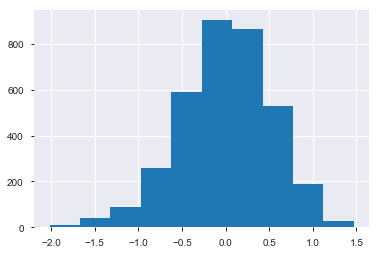

In [65]:
lm1.resid.hist(bins=10)

In [66]:
lm1.resid.mean()

1.3856090877847497e-14

<b>Assumptions checking - Residuals should be normally distributed

C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


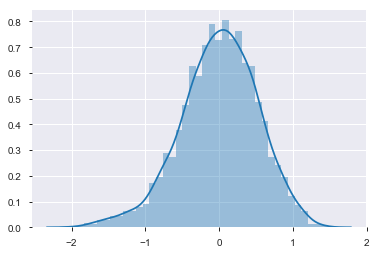

In [68]:
sns.distplot(lm1.resid)

<b>Building Model by sklearn

In [69]:
#This will be used in sklearn related functions
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_data[['age','ed','lninc','longten','gender_1','reason_2','card_2','card_3','card_4','card_5','card2_2','card2_3','card2_4','card2_5']],
                                                  credit_data['ln_Total_Spend'],
                                                  test_size = 0.3,                                                 
                                                  random_state = 1234)

In [70]:
## Building the model with train set and make predictions on test set
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
linreg.coef_

array([-2.36801929e-03, -8.58658569e-03,  3.50224010e-01,  2.69282874e-05,
       -5.67628560e-02,  2.41657783e-01, -5.67183013e-01, -6.05311525e-01,
       -6.82258126e-01, -5.05688156e-01, -4.01303185e-01, -3.88751829e-01,
       -4.19312581e-01, -3.02023438e-01])

In [72]:
linreg.score(train_X, train_y)

0.3484006018655876

In [73]:
y_pred_t = linreg.predict(train_X)
y_pred_t

array([6.08458176, 6.19007308, 6.16239454, ..., 6.38407143, 5.89358569,
       6.82064768])

In [74]:
#RMSE  & R-Square for train 
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print(rmse_t)
Ltrain_score=print(metrics.r2_score( train_y, y_pred_t ))
Ltrain_score

0.5246129899302251
0.34840060186558763


In [79]:
#RMSE  & R-Square for test
y_pred = linreg.predict(test_X)
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print(rmse)
Ltest_score=print(metrics.r2_score( test_y, y_pred ))
Ltest_score

0.5216729707130452
0.3209552221530453


In [80]:
residuals = train_y - y_pred_t

C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


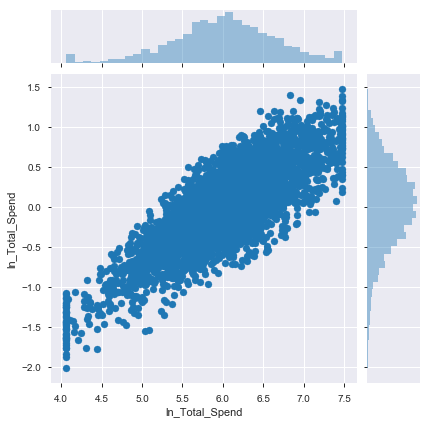

In [81]:
sns.jointplot(  train_y, residuals )

<b>Distribution of Residuals

C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


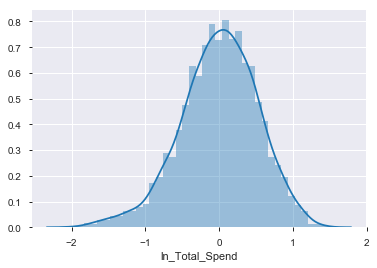

In [82]:
sns.distplot( residuals )

<b>Q-Q Plot

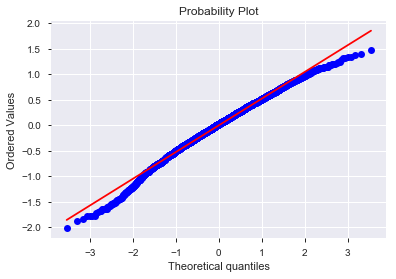

In [83]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

<b>Decile Analysis for Linear Regression

<b>Key Checks: Compare the deciles for training & testing as follows:-

<b>1)Rank orderng
    
<b>2)Decile wise comparision between actual & predicted
    
<b>3)Actual values are in the same order of predicted. Hence we can say that Rank order is same and this model is   statistically working fine.

In [84]:
### Decile Analysis
#Decile analysis for validation of models - Business validation

train['Deciles']=pd.qcut(train['pred_spend'],10, labels=False)
test['Deciles']=pd.qcut(test['pred_spend'],10, labels=False)
test

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


age    ed  employ  income     lninc  debtinc   creddebt  lncreddebt  \
2706  23.0  13.0     1.0   53.00  3.970292      4.0   1.149040    0.138927   
2436  66.0  17.0    26.0   31.00  3.433987      7.0   0.833280   -0.182386   
1201  71.0  13.0    27.0   12.00  2.484907     17.0   0.599760   -0.511226   
1486  61.0  19.0     3.0   22.00  3.091042     10.5   0.468930   -0.757302   
4286  55.0  16.0    24.0  272.01  5.605839      4.2   1.053360    0.051985   
2391  57.0  13.0     6.0   45.00  3.806662      9.3   1.201095    0.183234   
4911  44.0  17.0     7.0   62.00  4.127134      8.3   3.051578    1.115659   
3262  61.0  12.0    20.0   40.00  3.688879     18.7   2.229040    0.801571   
1361  69.0  16.0    28.0   60.00  4.094345     15.4   1.256640    0.228441   
149   64.0  16.0    22.0   98.00  4.584967     13.1   5.302094    1.668102   
3123  54.0  12.0    23.0  245.00  5.501258     14.3   3.853850    1.349073   
2395  23.0  13.0     4.0   28.00  3.332205      1.6   0.266560   -1.322156   
4677  32.0  11.0     7.0   37.00  3.610918     18.9   3.132864    1.141948   
419   61.0   9.0    22.0  105.00  4.653960     10.7   3.797430    1.334325   
3496  37.0  18.0    10.0   61.00  4.110874      2.3   0.690276   -0.370664   
3698  30.0  19.0     1.0   42.00  3.737670     24.7   1.670214    0.512952   
2703  50.0  12.0    16.0   47.00  3.850148     10.9   1.460055    0.378474   
2582  44.0  11.0     4.0   36.00  3.583519     13.0   0.804960   -0.216963   
2835  46.0  15.0     6.0   64.00  4.158883      6.8   1.836544    0.607886   
4440  57.0  16.0    11.0  272.00  5.605802      9.7   2.928624    1.074533   
613   70.0  13.0    19.0   54.00  3.988984     10.2   2.577744    0.946915   
2240  70.0  11.0    39.0   15.00  2.708050     10.5   0.518175   -0.657442   
2606  66.0  17.0    29.0  133.00  4.890349      4.1   1.286908    0.252242   
4860  18.0  11.0     1.0   15.00  2.708050      4.3   0.090945   -2.397500   
2361  72.0  12.0    18.0   55.00  4.007333     13.3   2.501730    0.916982   
142   60.0  12.0    21.0  131.00  4.875197      5.3   3.145179    1.145871   
2571  69.0  13.0    31.0   28.00  3.332205     10.2   2.247672    0.809895   
3658  61.0  18.0    16.0  252.00  5.529429     12.5  14.280358    2.658910   
1664  29.0  14.0     5.0   22.00  3.091042     10.0   0.693000   -0.366725   
3573  26.0  13.0     1.0   18.00  2.890372      6.0   0.329400   -1.110482   
...    ...   ...     ...     ...       ...      ...        ...         ...   
991   63.0   9.0    19.0  136.00  4.912655      3.3   0.610368   -0.493693   
4369  30.0   8.0     2.0   28.00  3.332205      1.9   0.341544   -1.074279   
398   70.0  14.0    20.0  102.00  4.624973     13.3   5.114382    1.632057   
1421  36.0  17.0     1.0   23.00  3.135494      3.1   0.094116   -2.363227   
3497  47.0  18.0    11.0   90.00  4.499810     22.0   3.366000    1.213725   
522   45.0  16.0    12.0   41.00  3.713572      8.3   0.401554   -0.912413   
4216  44.0  15.0    13.0  121.00  4.795791     29.2  10.309684    2.333084   
320   23.0  15.0     0.0   64.00  4.158883      4.3   1.835584    0.607363   
305   42.0  14.0     3.0   34.00  3.526361     14.7   0.674730   -0.393443   
4121  48.0  17.0     8.0   81.00  4.394449      2.7   1.428111    0.356353   
3250  68.0  15.0    10.0   36.00  3.583519     11.6   0.931248   -0.071230   
2782  60.0  17.0     8.0   93.00  4.532599      8.2   1.708224    0.535454   
819   66.0  13.0    25.0  167.00  5.117994     11.5   5.953550    1.783988   
1218  67.0  11.0     3.0   24.00  3.178054     22.9   1.500408    0.405737   
4224  20.0  12.0     1.0   15.00  2.708050      3.3   0.069795   -2.662193   
1627  68.0  16.0     4.0   18.00  2.890372      7.7   0.450450   -0.797508   
961   48.0  19.0    12.0  121.00  4.795791      6.5   2.249390    0.810659   
2109  37.0  12.0     5.0   44.00  3.784190     13.3   1.158696    0.147295   
719   25.0  13.0     3.0   14.00  2.639057      7.2   0.278208   -1.279386   
4233  28.0  13.0     4.0   29

In [85]:
# Decile Analysis for train data
Predicted_avg = train[['Deciles','pred_spend']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred_spend']
Actual_avg = train[['Deciles','Total Spend']].groupby(train.Deciles).mean().sort_index(ascending=False)['Total Spend']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

pred_spend  Total Spend
Deciles                         
9        849.823103   918.225915
8        623.352141   715.902733
7        527.889686   588.127563
6        464.835860   530.817357
5        411.770416   493.628435
4        369.670240   416.806386
3        334.845585   372.121430
2        304.719316   352.420730
1        274.660933   312.966702
0        226.746002   263.209728

In [86]:
# Decile Analysis for train data
Predicted_avg = test[['Deciles','pred_spend']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred_spend']
Actual_avg = test[['Deciles','Total Spend']].groupby(test.Deciles).mean().sort_index(ascending=False)['Total Spend']

In [87]:
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)
Decile_analysis_test

pred_spend  Total Spend
Deciles                         
9        819.180219   871.393096
8        609.573487   694.076349
7        519.256482   563.710765
6        459.935482   501.731483
5        410.430110   471.104483
4        368.302114   403.574933
3        336.225450   406.338584
2        308.234427   351.819184
1        279.369753   338.841400
0        233.173077   262.056304

In [88]:
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')

<b>Building Model Using Decision Trees

In [89]:
#This will be used in sklearn related functions
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_data[['age','ed','lninc','longten','gender_1','reason_2','card_2','card_3','card_4','card_5','card2_2','card2_3','card2_4','card2_5']],
                                                  credit_data['Total Spend'],
                                                  test_size = 0.3,                                                 
                                                  random_state = 1234)

In [90]:
import sklearn.tree as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [91]:
clf_tree = DecisionTreeRegressor( max_depth = 4,random_state=1 )
clf_tree=clf_tree.fit( train_X, train_y )

In [92]:
Reg_trainX=clf_tree.predict(train_X)

In [93]:
Reg_testX= clf_tree.predict( test_X )

In [94]:
np.sqrt(metrics.mean_squared_error(train_y,Reg_trainX))

290.68493310010746

In [95]:
np.sqrt(metrics.mean_squared_error(test_y,Reg_testX))

284.3321881319957

<b>Parameter Tuning

In [96]:
param_grid = {'max_depth': np.arange(8, 20),
             'max_features': np.arange(6,15)}

In [97]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), 'max_features': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
tree.best_params_

{'max_depth': 8, 'max_features': 10}

In [99]:
tree.best_score_

0.1427928754519159

In [100]:
tree.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=10,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [101]:
#Fitting Model with best parameters
clf_tree = DecisionTreeRegressor( max_depth = 8, max_features=10)
clf_tree.fit( train_X, train_y )

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=10,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [102]:
clf_tree.feature_importances_

array([0.084058  , 0.05163375, 0.46884814, 0.07788206, 0.01859507,
       0.03587556, 0.08913901, 0.05151441, 0.06385184, 0.01258124,
       0.02021086, 0.00799773, 0.01051578, 0.00729655])

In [103]:
list(zip(train_X.columns,clf_tree.feature_importances_ ))

[('age', 0.08405799886573183),
 ('ed', 0.051633752353869765),
 ('lninc', 0.46884813523217234),
 ('longten', 0.07788205537166772),
 ('gender_1', 0.018595072727643262),
 ('reason_2', 0.0358755630670759),
 ('card_2', 0.0891390119764425),
 ('card_3', 0.05151440632019782),
 ('card_4', 0.06385183655019065),
 ('card_5', 0.012581241336931476),
 ('card2_2', 0.02021086069832628),
 ('card2_3', 0.0079977343853402),
 ('card2_4', 0.010515781611977701),
 ('card2_5', 0.007296549502432602)]

In [104]:
#Predictions:-
tree_test=clf_tree.predict(test_X)
tree_train=clf_tree.predict(train_X)

In [105]:
np.sqrt(metrics.mean_squared_error(test_y,tree_test))

288.15610147716734

In [106]:
np.sqrt(metrics.mean_squared_error(train_y,tree_train))

245.1485864493868

In [108]:
Dtest_score=print(metrics.r2_score( test_y, tree_test ))
Dtest_score

0.1238462324681725


<b>Model Building throungh Random Forest

In [109]:
import sklearn.ensemble as en

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [111]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100 ,max_features=14, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=14, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [112]:
radm_clf.n_features_

14

In [113]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [114]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(test_y, radm_test_pred.predicted))

275.9326821325736

<b>Feature Importance

In [115]:
radm_clf.feature_importances_

array([0.1407125 , 0.10518335, 0.32304872, 0.19723862, 0.02618376,
       0.02299337, 0.04300898, 0.03553578, 0.03175771, 0.01336928,
       0.01946211, 0.02009352, 0.01621854, 0.00519375])

In [116]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

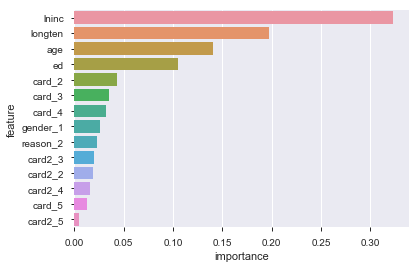

In [117]:
import seaborn as sn
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

<b>Parameter Tuning

In [118]:
pargrid_rf = {'n_estimators': [100,200,300,320,350,380,400,450,480,500,600,700,800],
                  'max_features': [5,6,7,8,9,10,12,14]}

gscv_rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y)

Fitting 5 folds for each of 104 candidates, totalling 520 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 520 out of 520 | elapsed: 12.8min finished


In [119]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 380}

In [120]:
gscv_results.best_score_

0.2861755804651379

In [121]:
radm_clf1 = RandomForestRegressor(oob_score=True,n_estimators=380 , max_features=5, n_jobs=-1)
radm_clf1.fit( train_X, train_y )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=380, n_jobs=-1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [122]:
radm_clf1.predict(test_X)

array([495.78121053, 324.29941474, 243.27369474, ..., 487.09941474,
       375.33976947, 499.10632947])

In [123]:
radm_clf1.predict(train_X)

array([ 929.32784211,  491.68552526,  465.52283474, ...,  729.30478737,
        313.58342105, 1108.44067368])

<b>RMSE of test & train

In [124]:
np.sqrt(metrics.mean_squared_error(test_y, radm_clf1.predict(test_X)))

266.2507364454064

In [125]:
np.sqrt(metrics.mean_squared_error(train_y,radm_clf1.predict(train_X)))

103.09019933863445

In [126]:
Rtest_score=print(metrics.r2_score( test_y, radm_clf1.predict(test_X)))
Rtest_score

0.25199185224263543


<b>Building Model by Lasso,Ridge & ElasticNet

In [137]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [138]:
pipelines = {
    'lasso' : make_pipeline(StandardScaler() , Lasso(random_state = 123)),
    'ridge' : make_pipeline(StandardScaler() , Ridge(random_state = 123)),
    'enet'  : make_pipeline(StandardScaler()  , ElasticNet(random_state = 123))
}

In [139]:
lasso_hyperparameters = {
    'lasso__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]
}
# Ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]
}
# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' :[ 0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10],
    'elasticnet__l1_ratio' : [ 0.1 , 0.3 , 0.5 , 0.7 , 0.9] 
}

# Create hyperparameters dictionary
hyperparameters = {
    
    'lasso' : lasso_hyperparameters,
    'ridge'  : ridge_hyperparameters,
    'enet'     : enet_hyperparameters
}

In [140]:
for key in ['enet', 'ridge', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [141]:
from sklearn.model_selection import GridSearchCV
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline , hyperparameters[name] , cv = 5, verbose=2,n_jobs=3, return_train_score=True)
    
    # Fit model on X_train, y_train
    model.fit(train_X , train_y)
    
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Done  40 out of  45 | elapsed:   15.8s remaining:    1.9s
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:   15.8s finished


lasso has been fitted.
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:    5.8s finished


ridge has been fitted.
Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=3)]: Done  52 tasks      | elapsed:    6.1s


enet has been fitted.


[Parallel(n_jobs=3)]: Done 220 out of 225 | elapsed:    7.0s remaining:    0.1s
[Parallel(n_jobs=3)]: Done 225 out of 225 | elapsed:    7.0s finished


In [142]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(test_X)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.


In [143]:
# Display best_score_ for each fitted model
for name , model in fitted_models.items():
    print(name , model.best_score_)

lasso 0.3384764819202137
ridge 0.33851988179690046
enet 0.3385196638782148


In [144]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [145]:
for name, model  in fitted_models.items():
    pred = model.predict(test_X)
    print(name)
    print("----------")
    print("R^2:" , r2_score(test_y , pred))
    print("MAE: ", mean_absolute_error(test_y , pred))
    print("RMSE: ", mean_squared_error(test_y , pred))

lasso
----------
R^2: 0.31301017817014865
MAE:  188.80226750876957
RMSE:  65106.68897248491
ridge
----------
R^2: 0.31301932235843644
MAE:  188.7903530460763
RMSE:  65105.82236892857
enet
----------
R^2: 0.31303161105314736
MAE:  188.7885582470367
RMSE:  65104.65775746128
